# Tips Dataset
_______________________________________________________________________________________________________________________________

## Introduction 


This document has been created to understand the well know TIps Dataset, we will evaluate the information, using Python packages and Seaborn plots to understand the data working in Jupyter. 


The project is separated in three main areas which are Description, regression and analyse and will be explained in the document.

### About Tips Dataset 

One waiter recorded information about each tip he received over a period of two and a half month working in one restaurant in early 1990. The restaurant, located in a suburban shopping mall, was one of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking sections to patrons who requested it. The data
was assigned to those days and during those times when the food server was routinely assigned to work.

Tips Dataset contains a dataframe with 244 obervations on 8 variables, that allow hospitality managers understand the factors that influence their business, incuding size of the party, smoking preferences, table locations, among others.



 

# Description: 
In this section we will review different tables, plots and process to describe the Tips Dataset 
_______________________________________________________________________________________________________________________________


### Import Libraries: 
As first step we need to import the libraries, this will help to analyse the data in a more efficient way

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset: 

The data can be loaded from a CSV file. You can also see the document in the repository of this project. 

In [19]:
df= pd.read_csv("tips dataset.csv")

### Check Dimension Dataset: 
the dataset contains 244 attributes under 8 variables, as we can see when we print the shape.

In [20]:
print (df.shape)

(244, 8)


### Evaluate the Data: 
First of all we want to take a look of the attributes presented in the data, so we print the first rows of the dataset and we can see for Tips dataset we have 8 variables which are 4 numeric and 4 strings.

It is also recommended to review the tail, to make sure there is consistency on the data and it is easier to notice if there is any change or information missed. In the example below, we don't see significant difference from the head and as expected there is a total of 244 observations which indicates we can work with the data.

In [21]:
print (df.head())

   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           1       16.99  1.01  Female     No  Sun  Dinner     2
1           2       10.34  1.66    Male     No  Sun  Dinner     3
2           3       21.01  3.50    Male     No  Sun  Dinner     3
3           4       23.68  3.31    Male     No  Sun  Dinner     2
4           5       24.59  3.61  Female     No  Sun  Dinner     4


In [22]:
print (df.tail())

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size
239         240       29.03  5.92    Male     No   Sat  Dinner     3
240         241       27.18  2.00  Female    Yes   Sat  Dinner     2
241         242       22.67  2.00    Male    Yes   Sat  Dinner     2
242         243       17.82  1.75    Male     No   Sat  Dinner     2
243         244       18.78  3.00  Female     No  Thur  Dinner     2


### Summary of each attribute and other observations:
We can see the summary of the attributes which include minimum, maximum, standards, percentiles among other information with the describe formula. 

From the information below we observe: 

- The average bill was 20 dollars with an average tip of 3 dollars, which means in standard the parties paid around 15% in tips. This is a reasonable standard amount for tips in America. 
- The minimun Bill was 3 dollars and the maximum 51 dollars, which means the restaurant is price friendly. Considering the maximum is for more than one person. 
- The size of tables are from 1 to 6 people, we can consider the place do not have espace for big amount of people in one service. 

In [23]:
print (df.describe())

       Unnamed: 0  total_bill         tip        size
count  244.000000  244.000000  244.000000  244.000000
mean   122.500000   19.785943    2.998279    2.569672
std     70.580923    8.902412    1.383638    0.951100
min      1.000000    3.070000    1.000000    1.000000
25%     61.750000   13.347500    2.000000    2.000000
50%    122.500000   17.795000    2.900000    2.000000
75%    183.250000   24.127500    3.562500    3.000000
max    244.000000   50.810000   10.000000    6.000000


### Tables 

**View 1:** In the table below we compared the number of days and the party size and observe:

- Monday, Tuesday and Wednesday were not taken in consideration for this dataset purpose, or there is the possibility that the waitress did not have shift at these days. 
- The average visit of parties on Fridays is considerable low compared with the rest of the days recorded. There should be evaluated the causes this is not a normal average for Friday, althought the possibility the waitress worked a limit ammount of hours should be consider as well. 
- The days with more visit are Saturdays followed by Sundays as expected for weekends

In [24]:
print(df.groupby('day').size())

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64


**View 2:** In the table below we compared the day of the week and time of visit, taking gender per count and observe:

- There is no recorder information on lunch for Saturday or Sunday which mean most of the visitors go for dinner on weekends
- There is just 1 visit for dinner on Thursday which is not a normal rate compared with the rest of 61 that visited during lunch. Need to be reviewed to apply changes as necessary
- In general, there is more visit of people for dinner

In [25]:
df[['day', 'time', 'sex']].groupby(['day', 'time']).count()

sex
day  time       
Fri  Dinner   12
     Lunch     7
Sat  Dinner   87
Sun  Dinner   76
Thur Dinner    1
     Lunch    61

**View 3:** In the table below we compared the number of males and females that visited the restaurant and we see that there are more males that go to the restaurant than females. 

In [26]:
print(df.groupby('sex').size())

sex
Female     87
Male      157
dtype: int64


**View 4:** In the table below we compared the average bill and tips per gender. 

- In average men pay slightly more in bills and give slightly less tips than females, if we compare by percentaje the media between the ammount they pay for total of the bill and the tip.  
- Men and woman has similar size of tables media, there is not considerable difference

In [27]:
print(df.groupby('sex').mean())


        Unnamed: 0  total_bill       tip      size
sex                                               
Female  129.080460   18.056897  2.833448  2.459770
Male    118.853503   20.744076  3.089618  2.630573


**View 5:** In the table below we compared the gender and size of tables per day of week and observe:

- Woman prefer the visit on Thursday and Saturday 
- Men give preferences to Saturday and Sundays

In [28]:
df[['day', 'sex', 'size']].groupby(['day', 'sex']).count()

size
day  sex         
Fri  Female     9
     Male      10
Sat  Female    28
     Male      59
Sun  Female    18
     Male      58
Thur Female    32
     Male      30

**View 6:** In the table below we compared smoker per gender, counting with the size and observe:

- More parties were seated in the non smoking section, no significant different between mena and woman in percentage

In [29]:
df[['sex', 'smoker', 'size']].groupby(['sex', 'smoker']).count()

size
sex    smoker      
Female No        54
       Yes       33
Male   No        97
       Yes       60

**View 7:** In the table below we compared tip per gender and size of the table and observe:

- More parties were seated in the non smoking section, no significant different between mena and woman in percentage

In [30]:
df[['sex', 'size', 'tip']].groupby(['sex', 'size']).mean()

tip
sex    size          
Female 1     1.276667
       2     2.528448
       3     3.250000
       4     4.021111
       5     5.140000
       6     4.600000
Male   1     1.920000
       2     2.614184
       3     3.476667
       4     4.172143
       5     3.750000
       6     5.850000

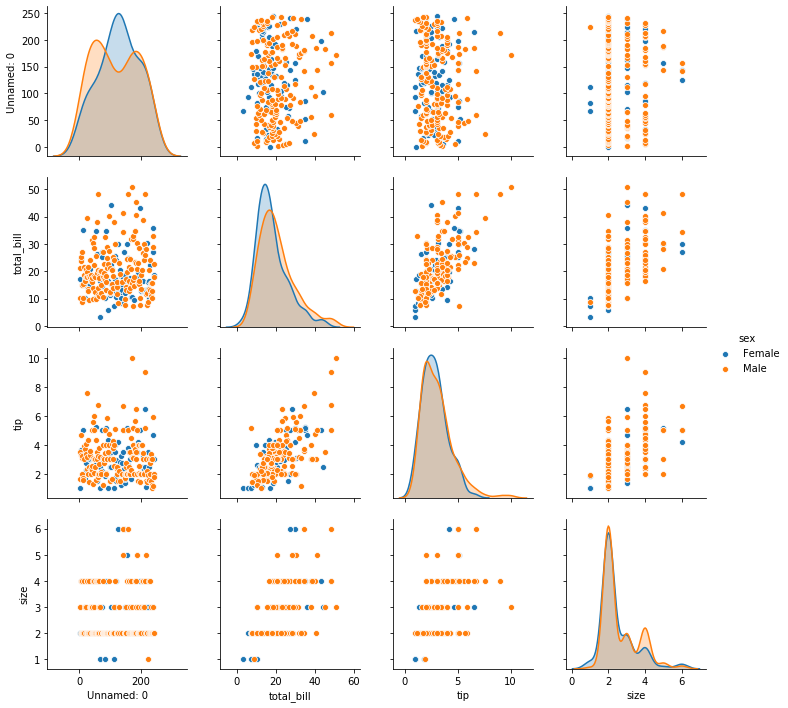

In [32]:
sns.pairplot (df, hue="sex")

References:

- https://en.wikipedia.org/wiki/Data_set
- https://rdrr.io/cran/regclass/man/TIPS.html
- https://dicook.public.iastate.edu/stat503/05/cs-tips2.pdf
- https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
- https://amitkushwaha.co.in/data-visualization-part-1.html
        https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed X
        https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 X
        https://swcarpentry.github.io/python-novice-gapminder/09-plotting/
        https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html
        